In [ ]:
!pip -q install lucid>=0.3.8
!pip -q install umap-learn>=0.3.7

In [ ]:
#Move to the main directory
%cd /content/
  
#Clone the project repository
!git clone https://github.com/NareshPS/humpback-whale.git
 

/content
Cloning into 'humpback-whale'...
remote: Enumerating objects: 252, done.
remote: Counting objects: 100% (252/252), done.
remote: Compressing objects: 100% (168/168), done.
remote: Total 1042 (delta 158), reused 165 (delta 83), pack-reused 790
Receiving objects: 100% (1042/1042), 24.21 MiB | 18.22 MiB/s, done.
Resolving deltas: 100% (673/673), done.


In [ ]:
#Pull the latest code
%cd /content/humpback-whale
!git pull --rebase

#Install dependencies
!pip install -r requirements.txt

/content/humpback-whale
Already up to date.
Current branch master is up to date.
    100% |████████████████████████████████| 368kB 23.2MB/s 
    100% |████████████████████████████████| 512kB 26.3MB/s 
    100% |████████████████████████████████| 40kB 16.9MB/s 
    100% |████████████████████████████████| 256kB 31.4MB/s 
  Stored in directory: /root/.cache/pip/wheels/ac/e1/d6/9061c9f7432b7204cb70134017d42fec8e8168d4b4caa5c23c
Successfully built rope


In [ ]:
#Variables
dropbox_data_path = 'cnn_mobilenet_balanced'
model_name = 'cnn_mobilenet.session_id.4.set_id.8.epoch.1.h5'
target_layer_name = 'block_4_depthwise_relu'

In [ ]:
#Dropbox client
from client.dropbox import DropboxConnection

params = DropboxConnection.Parameters('', dropbox_data_path)

#Dataset client
client = DropboxConnection(params)

In [ ]:
#Download the model
client.download(model_name)

Downloading: /run_data/cnn_mobilenet_balanced/cnn_mobilenet.session_id.4.set_id.8.epoch.1.h5: 100%|██████████| 37209324/37209324 [00:00<00:00, 43555499.81it/s]


In [ ]:
import tensorflow as tf

m = tf.keras.models.load_model(model_name)

Instructions for updating:
`normal` is a deprecated alias for `truncated_normal`
Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
Instructions for updating:
Deprecated in favor of operator or tf.math.divide.


In [ ]:
for layer in m.layers:
  print(layer.name)

input_1
Conv1_pad
Conv1
bn_Conv1
Conv1_relu
expanded_conv_depthwise
expanded_conv_depthwise_BN
expanded_conv_depthwise_relu
expanded_conv_project
expanded_conv_project_BN
block_1_expand
block_1_expand_BN
block_1_expand_relu
block_1_pad
block_1_depthwise
block_1_depthwise_BN
block_1_depthwise_relu
block_1_project
block_1_project_BN
block_2_expand
block_2_expand_BN
block_2_expand_relu
block_2_depthwise
block_2_depthwise_BN
block_2_depthwise_relu
block_2_project
block_2_project_BN
block_2_add
block_3_expand
block_3_expand_BN
block_3_expand_relu
block_3_pad
block_3_depthwise
block_3_depthwise_BN
block_3_depthwise_relu
block_3_project
block_3_project_BN
block_4_expand
block_4_expand_BN
block_4_expand_relu
block_4_depthwise
block_4_depthwise_BN
block_4_depthwise_relu
block_4_project
block_4_project_BN
block_4_add
block_5_expand
block_5_expand_BN
block_5_expand_relu
block_5_depthwise
block_5_depthwise_BN
block_5_depthwise_relu
block_5_project
block_5_project_BN
block_5_add
block_6_expand
bloc

In [ ]:
saver = tf.train.Saver()
sess = tf.keras.backend.get_session()
saver.save(sess, "model.ckpt")
#tf.train.write_graph(sess.graph_def, '.', "model.GraphDef")

output_node_names="dense_2/Softmax"
output_graph_def = tf.graph_util.convert_variables_to_constants(sess, sess.graph_def, output_node_names.split(","))

output_graph="model.pb"
with tf.gfile.GFile(output_graph, "wb") as f:
    f.write(output_graph_def.SerializeToString())

INFO:tensorflow:Froze 264 variables.
INFO:tensorflow:Converted 264 variables to const ops.


In [ ]:
saver = tf.train.import_meta_graph('./ckpt.meta', clear_devices=True)
graph = tf.get_default_graph()
input_graph_def = graph.as_graph_def()
sess = tf.Session()
saver.restore(sess, "./ckpt")

INFO:tensorflow:Restoring parameters from ./ckpt


In [ ]:
!ls

 analysis					  model.ckpt.index
 augment.py					  model.ckpt.meta
 checkpoint					  model_generation.py
 classify_labels.py				  model.GraphDef
 client						  model.pb
 cnn_mobilenet.session_id.4.set_id.8.epoch.1.h5   operation
 common						  predict.py
 configuration					  README.md
 defragment.py					  rebalance.py
 evaluate_inputs.py				  requirements.txt
 evaluate.py					 'Run Status.txt'
 Experiments.ipynb				  setup
 Insights.ipynb					  siamese
 insights.py					  siamese_input_tuples.py
 integration.py					  tests
 iofiles					  train.py
 model						  Transformation.ipynb
 model.ckpt.data-00000-of-00001


In [ ]:
graph_file = "model.pb"
graph_def = tf.GraphDef()

with open(graph_file, "rb") as f:
  graph_def.ParseFromString(f.read())

for node in graph_def.node:
  print(node.name)

input_1
Conv1_pad/Pad/paddings
Conv1_pad/Pad
Conv1/kernel
Conv1/Conv2D/ReadVariableOp
Conv1/Conv2D
bn_Conv1/gamma
bn_Conv1/beta
bn_Conv1/moving_mean
bn_Conv1/moving_variance
bn_Conv1/keras_learning_phase/input
bn_Conv1/keras_learning_phase
bn_Conv1/cond/Switch
bn_Conv1/cond/switch_t
bn_Conv1/cond/pred_id
bn_Conv1/cond/ReadVariableOp
bn_Conv1/cond/ReadVariableOp/Switch
bn_Conv1/cond/ReadVariableOp_1
bn_Conv1/cond/ReadVariableOp_1/Switch
bn_Conv1/cond/Const
bn_Conv1/cond/Const_1
bn_Conv1/cond/FusedBatchNorm
bn_Conv1/cond/FusedBatchNorm/Switch
bn_Conv1/cond/ReadVariableOp_2
bn_Conv1/cond/ReadVariableOp_2/Switch
bn_Conv1/cond/ReadVariableOp_3
bn_Conv1/cond/ReadVariableOp_3/Switch
bn_Conv1/cond/FusedBatchNorm_1/ReadVariableOp
bn_Conv1/cond/FusedBatchNorm_1/ReadVariableOp/Switch
bn_Conv1/cond/FusedBatchNorm_1/ReadVariableOp_1
bn_Conv1/cond/FusedBatchNorm_1/ReadVariableOp_1/Switch
bn_Conv1/cond/FusedBatchNorm_1
bn_Conv1/cond/FusedBatchNorm_1/Switch
bn_Conv1/cond/Merge
Conv1_relu/Relu6
expande

In [ ]:
tf.__file__

!python /usr/local/lib/python3.6/dist-packages/tensorflow/python/tools/freeze_graph.py \
  --input_graph=model.pb \
  --input_checkpoint=model.ckpt \
  --input_binary=true \
  --output_graph=model.pb.modelzoo \
  --output_node_names=dense_2/Softmax

Instructions for updating:
Use tf.gfile.GFile.
Instructions for updating:
Use standard file APIs to check for files with this prefix.
Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/framework/importer.py", line 426, in import_graph_def
    graph._c_graph, serialized, options)  # pylint: disable=protected-access
tensorflow.python.framework.errors_impl.InvalidArgumentError: Input 0 of node bn_Conv1/cond/ReadVariableOp/Switch was passed float from bn_Conv1/gamma:0 incompatible with expected resource.

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/tools/freeze_graph.py", line 491, in <module>
    run_main()
  File "/usr/local/lib/python3.6/dist-packages/tensorflow/python/tools/freeze_graph.py", line 488, in run_main
    app.run(main=my_main, argv=[sys.argv[0]] + unparsed)
  File "/usr/local/lib/python3.6/dist-packages

mixed10 <keras.layers.merge.Concatenate object at 0x7fc0cf5a8c18> is a merge layer. will linearize connected relu containing layers
	linearizing layer: activation_368
	linearizing layer: activation_370
	linearizing layer: activation_371
	linearizing layer: activation_374
	linearizing layer: activation_375
	linearizing layer: activation_376
512 31.768568



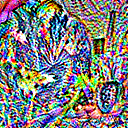

In [ ]:
from keras.models import load_model
from lucid4keras import prepare_model, keras_render_vis
from keras.applications.inception_v3 import InceptionV3

#Load the model
#model = load_model(model_name)
model = InceptionV3()

#Prepare the model for lucid visualization
lucid_model = prepare_model(model, layer_name = 'mixed10')

In [ ]:
# model.layers[7] is "mixed4c"

print(lucid_model)
print(lucid_model.layers[7])
raw_activations = lucid_model.layers[7].activations
activations = raw_activations[:100000]
print(activations.shape)

AttributeError: ignored

512 30.157753



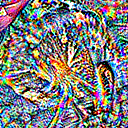

In [ ]:
#render
images_5 = keras_render_vis(lucid_model, 5)

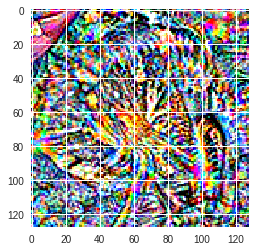

In [ ]:
from matplotlib import pyplot as plt
from numpy import squeeze

image = squeeze(images_5[0])

plt.figure(figsize = (4, 4))
plt.imshow(image)

In [ ]:
#Print model layers
for layer in model.layers:
  print(layer.name)

input_1
conv2d_1
batch_normalization_1
activation_1
conv2d_2
batch_normalization_2
activation_2
conv2d_3
batch_normalization_3
activation_3
max_pooling2d_1
conv2d_4
batch_normalization_4
activation_4
conv2d_5
batch_normalization_5
activation_5
max_pooling2d_2
conv2d_9
batch_normalization_9
activation_9
conv2d_7
conv2d_10
batch_normalization_7
batch_normalization_10
activation_7
activation_10
average_pooling2d_1
conv2d_6
conv2d_8
conv2d_11
conv2d_12
batch_normalization_6
batch_normalization_8
batch_normalization_11
batch_normalization_12
activation_6
activation_8
activation_11
activation_12
mixed0
conv2d_16
batch_normalization_16
activation_16
conv2d_14
conv2d_17
batch_normalization_14
batch_normalization_17
activation_14
activation_17
average_pooling2d_2
conv2d_13
conv2d_15
conv2d_18
conv2d_19
batch_normalization_13
batch_normalization_15
batch_normalization_18
batch_normalization_19
activation_13
activation_15
activation_18
activation_19
mixed1
conv2d_23
batch_normalization_23
activat

In [ ]:
# Visualizing a neuron is easy!

_ = render.render_vis(model, "block_12_depthwise_relu:1")

AttributeError: ignored